In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset=pd.read_csv("/content/tested.csv")

In [24]:
dataset.head(10)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [25]:
dataset=dataset[['Survived','Age','Sex','Pclass']]
dataset=pd.get_dummies(dataset,columns=['Sex','Pclass'])
dataset.dropna(inplace=True)
dataset.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,34.5,False,True,False,False,True
1,1,47.0,True,False,False,False,True
2,0,62.0,False,True,False,True,False
3,0,27.0,False,True,False,False,True
4,1,22.0,True,False,False,False,True


In [26]:
from sklearn.model_selection import train_test_split
X=dataset.drop('Survived', axis=1)
y=dataset['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train
Y_train
X_test
Y_test

62     0
67     0
66     1
239    1
181    0
      ..
157    1
379    0
303    0
259    0
5      0
Name: Survived, Length: 83, dtype: int64

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
classifier.fit(X_train,Y_train)



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [28]:
Y_pred=classifier.predict(X_test)
Y_pred


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

[[49  0]
 [ 0 34]]


1.0

In [30]:
from sklearn.metrics import confusion_matrix
classifier.score(X_test,Y_test) # Use 'classifier' instead of 'model'


1.0

In [31]:
from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[49,  0],
       [ 0, 34]])

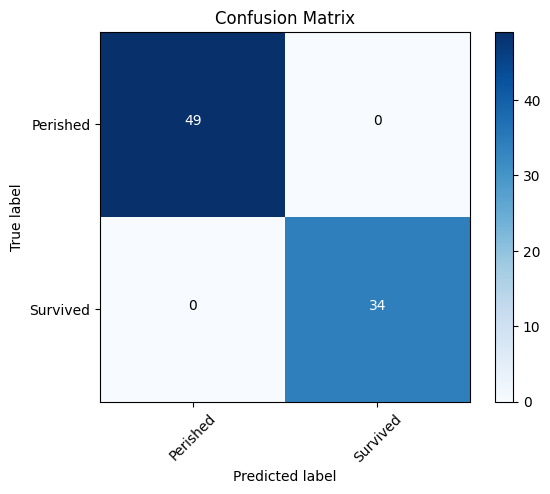

In [32]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# ... (Your existing code)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['Perished', 'Survived']))
plt.xticks(tick_marks, ['Perished', 'Survived'], rotation=45)
plt.yticks(tick_marks, ['Perished', 'Survived'])
fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        34

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



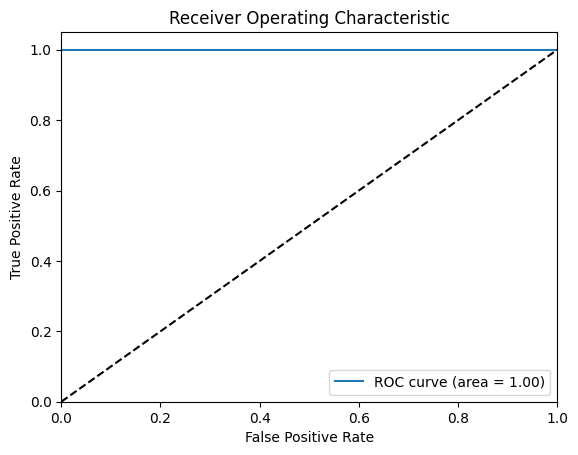

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [34]:
female=[[10,1,0,1,0,0]]
classifier.predict(female)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

In [35]:
probability = classifier.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 100.0%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [36]:
male = [[20, 0, 1, 0, 0, 1]]
probability = classifier.predict_proba(male)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 0.0%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
